In [1]:
# import convention
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


## Parts of a Figure
see: https://matplotlib.org/stable/_images/anatomy.png

Text(0.5, 0, 'time')

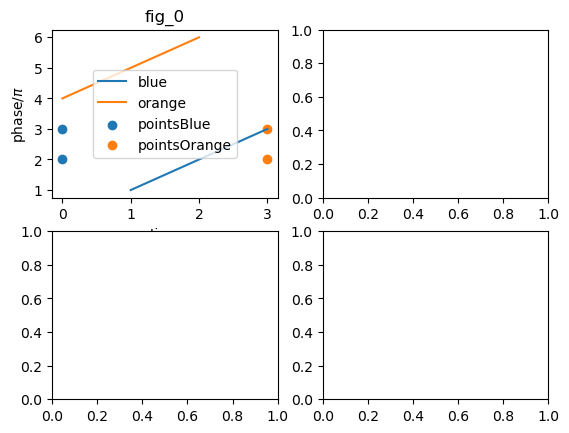

In [2]:
# fig = plt.figure()  # an empty figure with no Axes
# fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

ax0 = axs[0,0]
ax0.set_title("fig_0")
ax0.plot([1,2,3], [1,2,3])
ax0.plot([4,5,6])
ax0.scatter([0,0],[2,3])
ax0.scatter([3,3],[2,3])
ax0.legend(['blue', 'orange', 'pointsBlue', 'pointsOrange'])

ax0.set_ylabel('phase/$\pi$')
ax0.set_xlabel('time')

## Types of sources

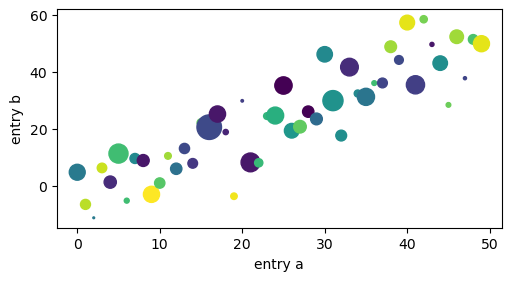

In [3]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

np.random.seed(19680801)  # seed the random number generator.
# dict
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

## spectrum

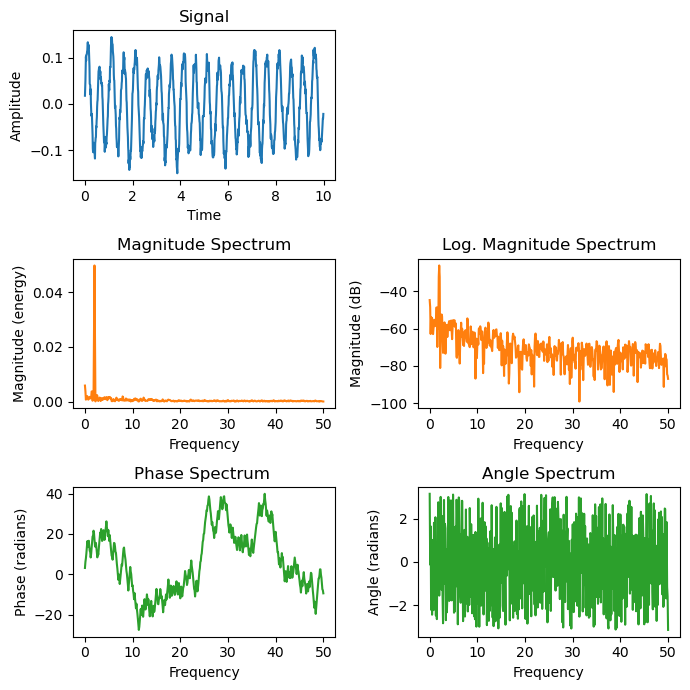

In [4]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

dt = 0.01  # sampling interval
Fs = 1 / dt  # sampling frequency
t = np.arange(0, 10, dt)

# generate noise:
nse = np.random.randn(len(t))
r = np.exp(-t / 0.05)
cnse = np.convolve(nse, r) * dt
cnse = cnse[:len(t)]

s = 0.1 * np.sin(4 * np.pi * t) + cnse  # the signal

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

# plot time signal:
axs[0, 0].set_title("Signal")
axs[0, 0].plot(t, s, color='C0')
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Amplitude")

# plot different spectrum types:
axs[1, 0].set_title("Magnitude Spectrum")
axs[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axs[1, 1].set_title("Log. Magnitude Spectrum")
axs[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axs[2, 0].set_title("Phase Spectrum ")
axs[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axs[2, 1].set_title("Angle Spectrum")
axs[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

axs[0, 1].remove()  # don't display empty ax

fig.tight_layout()
plt.show()

## spectrogram

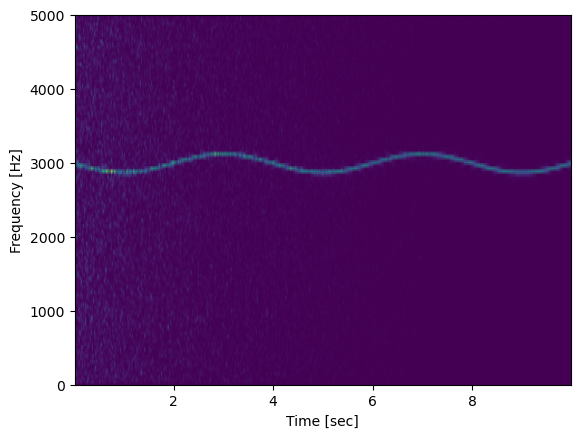

In [5]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## periodogram

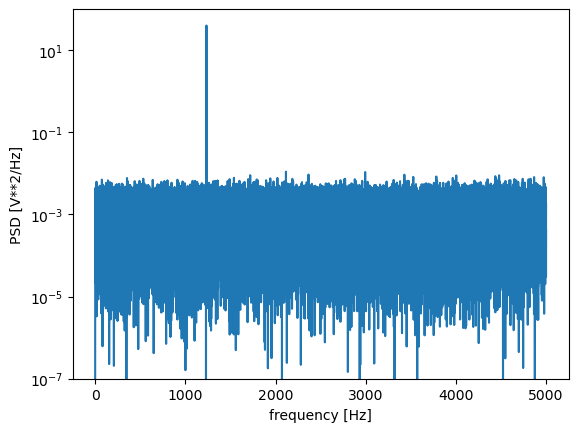

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += rng.normal(scale=np.sqrt(noise_power), size=time.shape)

f, Pxx_den = signal.periodogram(x, fs)
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()